## Statoil's `segyio` and `segyviewer`

#### I think the file [Read_SEG-Y_with_SegyIO.ipynb](Read_SEG-Y_with_SegyIO.ipynb) is better, more idiomatic.

We'll visualize a seismic volume with Statoil's own tools. Before you start, you need to install the following:

    pip install segyio  # This might not work; if not, install from source.
    
To use `segyviewer` you also need to install it:

    git clone https://github.com/Statoil/segyviewer.git
    cd segyviewer
    python setup.py install
    conda install pyqt=4
    
Then we have the usual preliminaries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

## Load the data with `segyio`

In [2]:
!ls ../data/*.sgy

../data/31_81_PR.sgy	       ../data/out.sgy
../data/F3_very_small.sgy      ../data/Penobscot_0-1000ms.sgy
../data/HUN00-ALT-01_STK.sgy   ../data/Penobscot.sgy
../data/ld0057_file_00095.sgy


In [3]:
import segyio

In [4]:
fname = "../data/Penobscot_0-1000ms.sgy"
with segyio.open(fname) as f:
    data = np.stack(np.copy(i) for i in f.iline)

In [5]:
data.shape

(601, 481, 251)

## Plot slices with `matplotlib`

In [6]:
tslice = 122
inline = 250
xline = 300

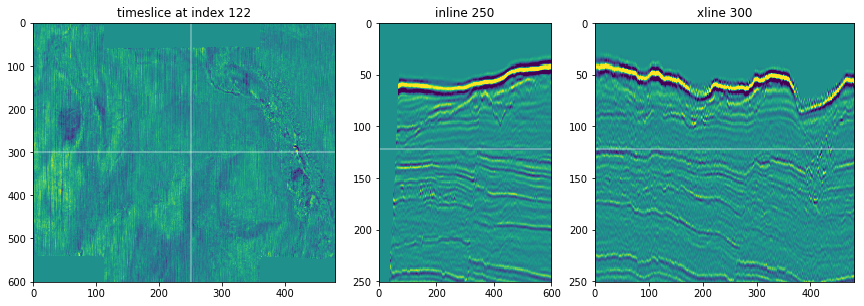

In [7]:
f = plt.figure(figsize=(12,4), facecolor='white')

params = dict(aspect='auto', cmap='viridis', vmin=-8000, vmax=8000)

# Plot timeslice
ax0 = f.add_axes([0.05, 0.05, 0.35, 0.90])
ax0.imshow(data[:, :, tslice], **params)
ax0.set_title('timeslice at index {}'.format(tslice))
ax0.axhline(xline, c='w', alpha=0.4)
ax0.axvline(inline, c='w', alpha=0.4)

# Plot inline
ax1 = f.add_axes([0.45, 0.05, 0.2, 0.90])
ax1.imshow(data[:, inline, :].T, **params)
ax1.set_title('inline {}'.format(inline))
ax1.axhline(tslice, c='w', alpha=0.4)

# Plot xline 
ax2 = f.add_axes([0.70, 0.05, 0.3, 0.90])
ax2.imshow(data[xline, :, :].T, **params)
ax2.set_title('xline {}'.format(xline))
ax2.axhline(tslice, c='w', alpha=0.4)

plt.show()

## Plot with `segyviewer`

For this to work (as of 2 January 2018) you must be on NumPy 1.11 or earlier.

In [8]:
from PyQt4.QtGui import QApplication
import segyviewlib
qapp = QApplication([])
l = segyviewlib.segyviewwidget.SegyViewWidget(fname)
l.show()

ModuleNotFoundError: No module named 'PyQt4'